<h1>HICT API<h1>

In [1]:
#Load the packages we will use
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from pathlib import Path

from hict.api.ContactMatrixFacet import ContactMatrixFacet
from hict.util.matrix_visualise import MatrixVisualise

In [2]:
#Load chunk file from .hdf5
chunkFile = ContactMatrixFacet.get_file_descriptor('data/arab_dongX_vs_mopti_2nd_try.hdf5')
ContactMatrixFacet.open_file(chunkFile)

#Add assembly information to chunk file
ContactMatrixFacet.load_assembly_from_agp(chunkFile, Path('data/mopti_female_assembly_2.agp'))

#Display available contigs in file
print(chunkFile.contig_names)

['scaffold_5']


In [3]:
#Choose first contig
contig_name = chunkFile.contig_names[0]

#Set resolution of matrix
res = 50000

#Load matrix from chunk file with applied cooler weigths
matrix = MatrixVisualise.get_matrix(chunk_file_with_agp=chunkFile, contig_name=contig_name,resolution= res, weighted=True)

#Load matrix from chunk file without applied cooler weigths
matrix = MatrixVisualise.get_matrix(chunk_file_with_agp=chunkFile, contig_name=contig_name,resolution= res, weighted=False)

In [4]:
#Creates matplotlib colormap with three colors - blue, white and red.
#Blue colors cover first 49.9% of values, white cover 0.01% in the middle and red covers rest 49.9%
#Levels and colors could be tuned
clr_map = MatrixVisualise.get_colormap_diverging(first_quarter=0.499, second_quarter=0.501)

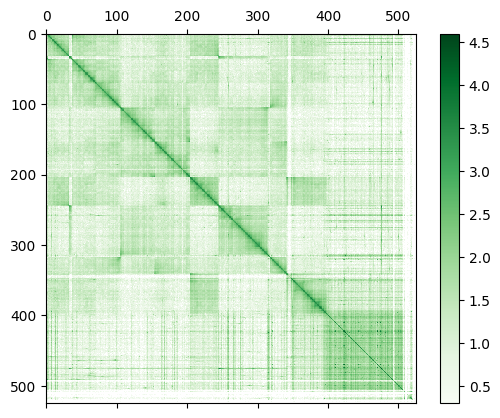

In [5]:
#Plot heatmap of loaded matrix with applied log scale and custom color map
#Log scale could be parameterized
#Parameter 'addition' stands for value added to initial values before taking logarithm to escape taking it from 0 and getting NaN
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(MatrixVisualise.log_matrix(matrix), cmap='Greens')
fig.colorbar(im)

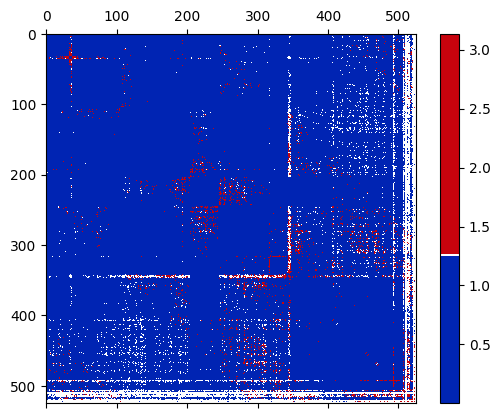

In [12]:
#Change colormap
clr_map = MatrixVisualise.get_colormap_diverging(first_quarter=0.399, second_quarter=0.401, mid_position=0.400)


#Get scaffold descriptor to set the mode observed values
#If observed values calculating for the area through which the main diagonal passes
#then they will count relatively on distance to main diagonal
#Neither observed value will be mean value for whole area

scf_desc = chunkFile.scaffold_holder.scaffold_table[1]

#Transiton to expected/observed values
#Other normalisations available: 'obs/exp', 'exp', 'exp-obs', 'obs-exp'
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc)
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(MatrixVisualise.log_matrix(matrix_obs), cmap=clr_map)
fig.colorbar(im)

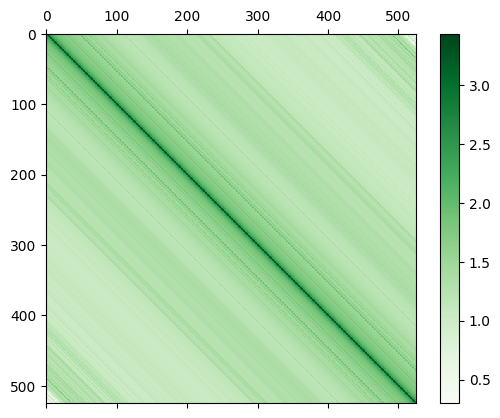

In [15]:
#How observed values distributed
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc, res="exp")
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(MatrixVisualise.log_matrix(matrix_obs), cmap='Greens')
fig.colorbar(im)